D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26631 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22352 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26631 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packag

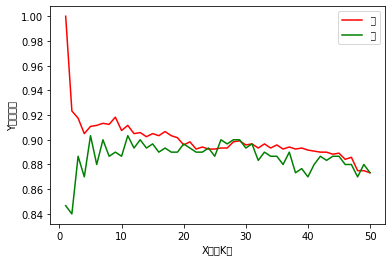

In [1]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
#import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
#导入数据集
#sUrl="https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/datasets/Social_Network_Ads.csv"
file_path = 'D:\\工具软件\\八斗AI第二期\\八斗AI第二期\\'
	#files = os.listdir(file_path.decode('utf-8'))
dataset = pd.read_excel(os.path.join(file_path, "NetwordAds.xls"), 0)
#dataset = pd.read_csv(sUrl) #'./datasets/Social_Network_Ads.csv'
X = dataset.iloc[:, [2, 3]].values#取集合的年龄和薪水
y = dataset.iloc[:, 4].values#购买能力
#print(X)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/4,random_state=0)
#print(X_train)
#print(X_test)
#数据fit
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train)
#print(X_test)
param_name = 'n_neighbors'
N1=51
param_range = range(1, N1)
# scoring: 分类用 accuracy, 回归用 mean_squared_error
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, cv=5,param_name=param_name,param_range=param_range,scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(param_range,train_scores_mean, color='red', label='train')
plt.plot(param_range, test_scores_mean, color='green', label='test')
plt.legend('最优')
plt.xlabel('X坐标K值')
plt.ylabel('Y坐标均值')
plt.show()